Taller Elaborado por: Sebastian Rivera

In [44]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [45]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

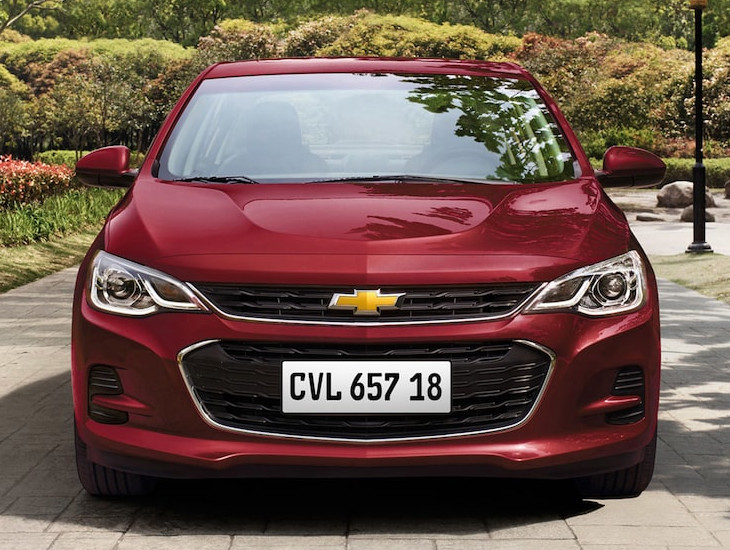

In [46]:
placa = []
image = cv2.imread('auto001.jpg')
cv2_imshow(image)

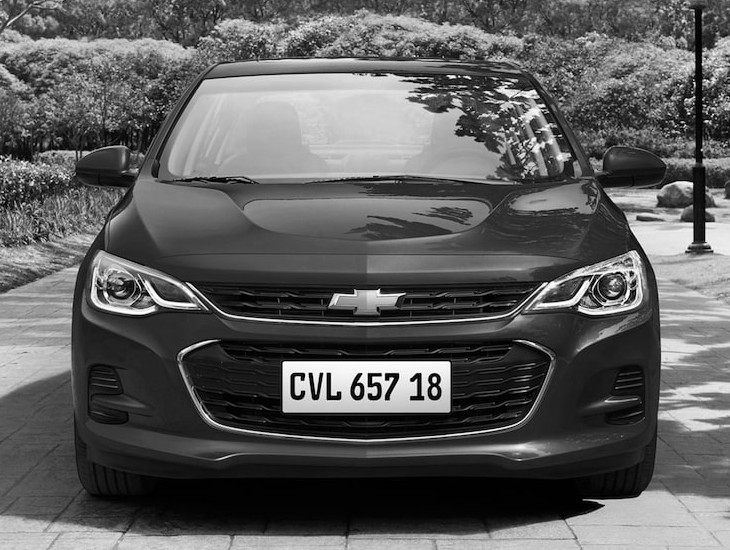

In [47]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

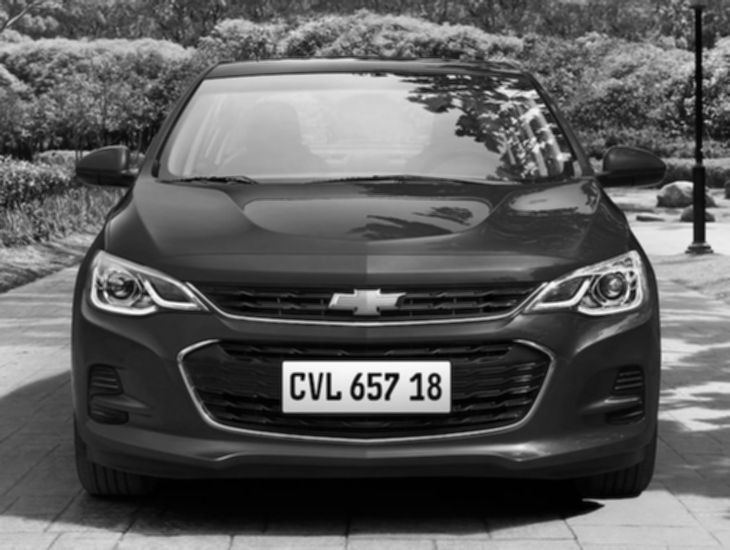

In [48]:
gray2 = cv2.blur(gray, (3,3))
cv2_imshow(gray2)

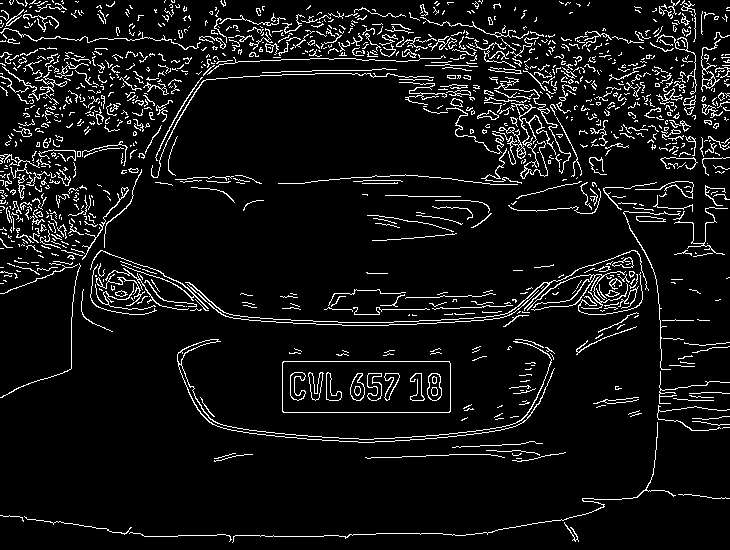

In [49]:
canny = cv2.Canny(gray2, 150, 200)
cv2_imshow(canny)

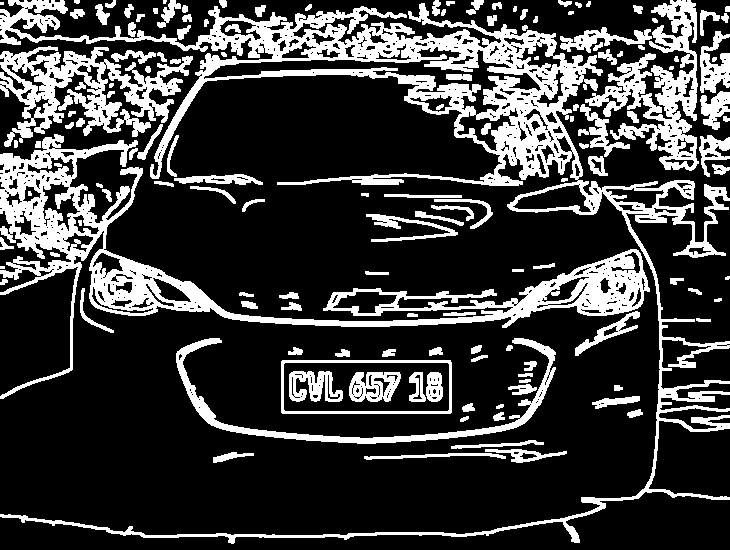

In [50]:
canny2 = cv2.dilate(canny, None, iterations=1)
cv2_imshow(canny2)

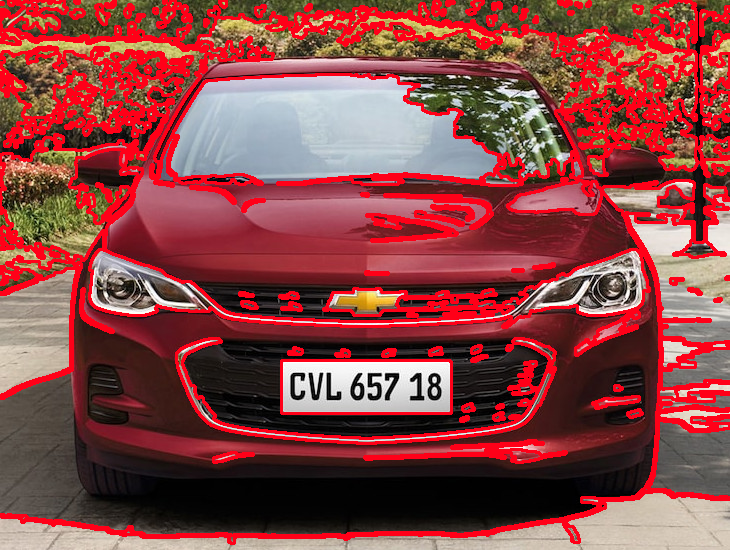

In [51]:
cnts,_ = cv2.findContours(canny2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (24,0,255), 2)
cv2_imshow(image)

area= 9007.0
aspect_ratio= 3.1666666666666665
PLACA:  CVL 657 18



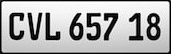

In [53]:
for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09*cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, epsilon, True)
  #print('approx.'. approx. ' area= 'area')
  if len(approx) == 4 and area > 9000:
    print('area=', area)
    cv2.drawContours(image, [approx], 0, (0,255,0), 3)
    aspect_ratio = float(w)/h
    print('aspect_ratio=', aspect_ratio)
    if aspect_ratio > 2.4:
      placa = gray[y:y+h, x:x+w]
      text = pytesseract.image_to_string(placa,config='--psm 11')
      print('PLACA: ', text)
      cv2_imshow(placa)
      cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 3)
      cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0,255,0), 3)
